# 1. Linear Regression
Code Implementation


[*********************100%***********************]  1 of 1 completed


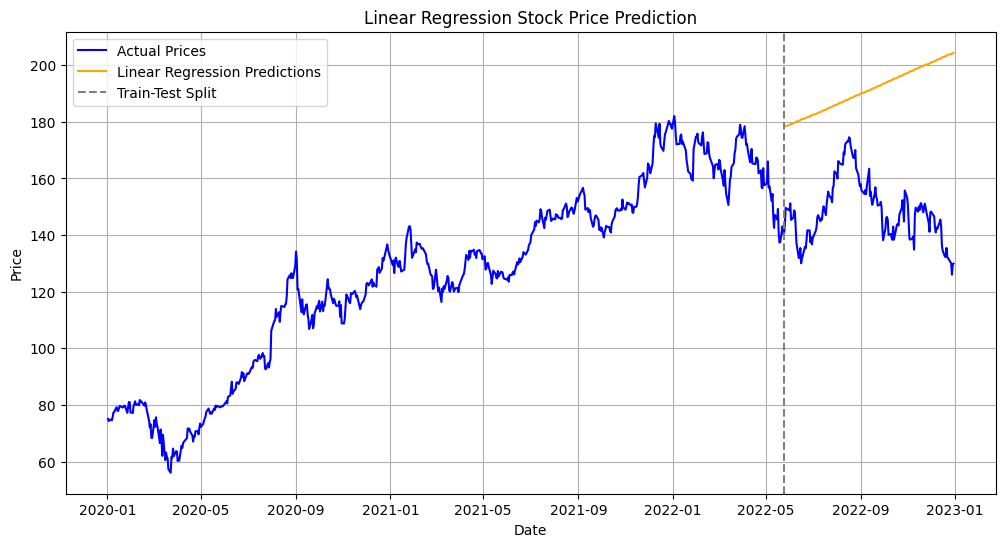

Linear Regression MSE: 2043.2500760705511


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch stock data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"
data = yf.download(ticker, start=start_date, end=end_date)['Close'].dropna()

# Train-test split
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Prepare data for Linear Regression
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data.values
X_test = np.arange(len(train_data), len(data)).reshape(-1, 1)

# Train Linear Regression
lr_model = LinearRegression().fit(X_train, y_train)

# Predict
lr_forecast = lr_model.predict(X_test)

# Calculate MSE
lr_mse = mean_squared_error(test_data, lr_forecast)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label="Actual Prices", color="blue")
plt.plot(test_data.index, lr_forecast, label="Linear Regression Predictions", color="orange")
plt.axvline(data.index[train_size], linestyle="--", color="gray", label="Train-Test Split")
plt.title("Linear Regression Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

print(f"Linear Regression MSE: {lr_mse}")


2. Auto ARIMA

Code Implementation


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2891.218, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2887.831, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2885.852, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2885.825, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2886.840, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2887.797, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2887.819, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2889.640, Time=1.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2885.037, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2887.045, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2887.036, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2885.047, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2888.824, Time=1.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.681 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


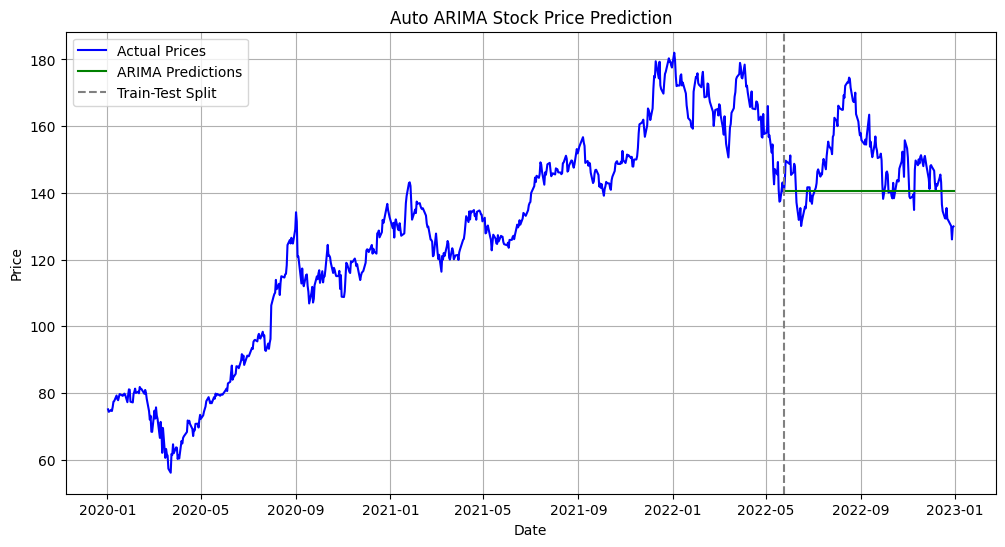

Auto ARIMA MSE: 175.96707585474505


In [ ]:
from pmdarima import auto_arima

# Train Auto ARIMA
arima_model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

# Predict
arima_forecast, _ = arima_model.predict(n_periods=len(test_data), return_conf_int=True)

# Calculate MSE
arima_mse = mean_squared_error(test_data, arima_forecast)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label="Actual Prices", color="blue")
plt.plot(test_data.index, arima_forecast, label="ARIMA Predictions", color="green")
plt.axvline(data.index[train_size], linestyle="--", color="gray", label="Train-Test Split")
plt.title("Auto ARIMA Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

print(f"Auto ARIMA MSE: {arima_mse}")


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


3. LSTM

Code Implementation


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.1440
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0162
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0090
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0066
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0063
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0059
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0056
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0061
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0060
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0061
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


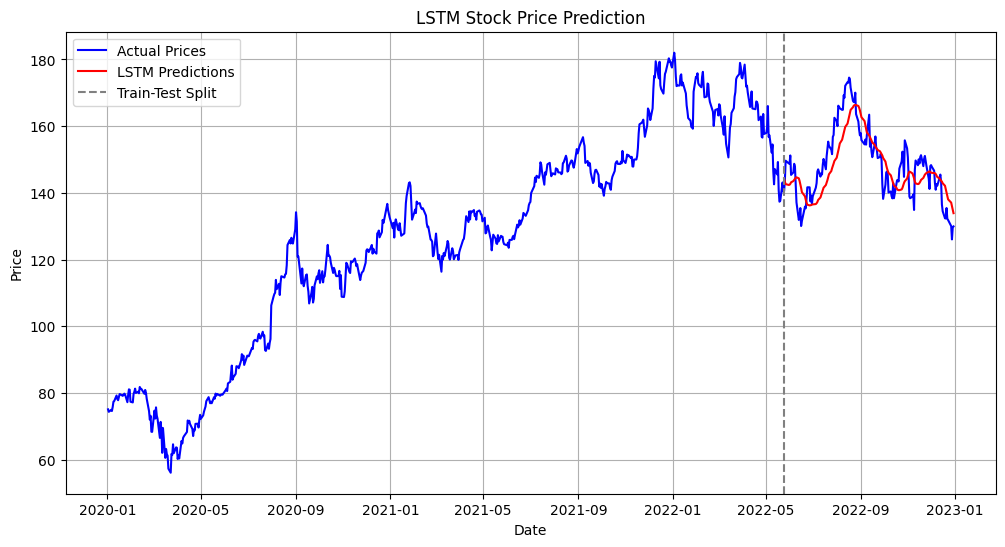

LSTM MSE: 43.51322779954621


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences
sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Split into train-test
X_train, X_test = X[:train_size - sequence_length], X[train_size - sequence_length:]
y_train, y_test = y[:train_size - sequence_length], y[train_size - sequence_length:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
lstm_predictions_scaled = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_predictions_scaled)

# Calculate MSE
lstm_mse = mean_squared_error(test_data.values[-len(lstm_forecast):], lstm_forecast)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label="Actual Prices", color="blue")
plt.plot(test_data.index[-len(lstm_forecast):], lstm_forecast, label="LSTM Predictions", color="red")
plt.axvline(data.index[train_size], linestyle="--", color="gray", label="Train-Test Split")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

print(f"LSTM MSE: {lstm_mse}")


________________________________________
4. Model Comparison

Combined Plot


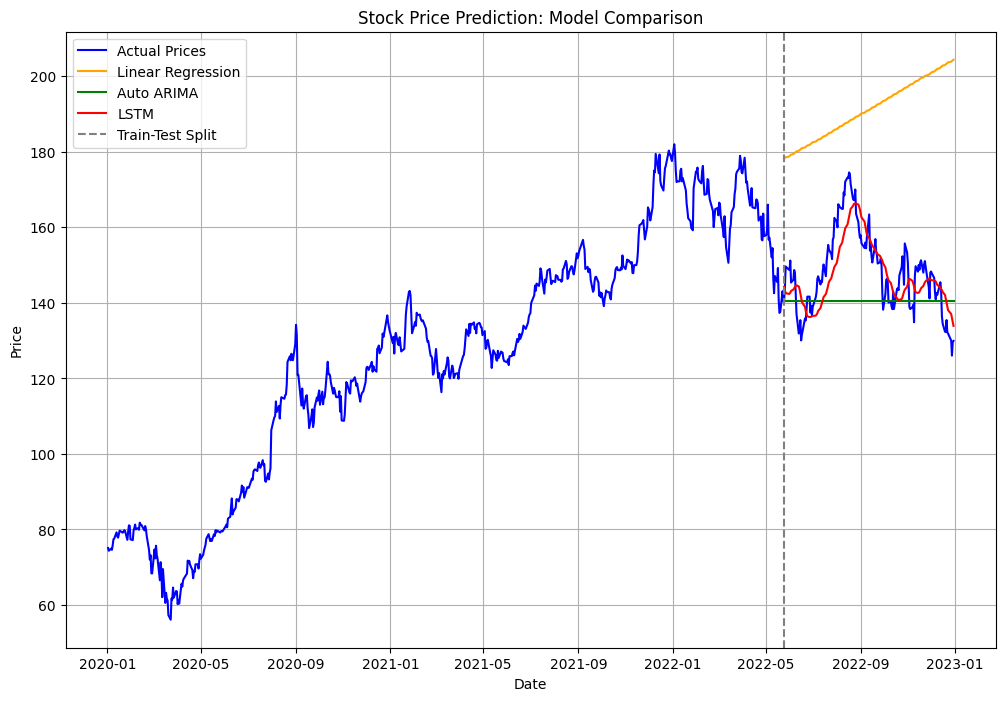

Linear Regression MSE: 2043.2500760705511
Auto ARIMA MSE: 175.96707585474505
LSTM MSE: 43.51322779954621


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data, label="Actual Prices", color="blue")
plt.plot(test_data.index, lr_forecast, label="Linear Regression", color="orange")
plt.plot(test_data.index, arima_forecast, label="Auto ARIMA", color="green")
plt.plot(test_data.index[-len(lstm_forecast):], lstm_forecast, label="LSTM", color="red")
plt.axvline(data.index[train_size], linestyle="--", color="gray", label="Train-Test Split")
plt.title("Stock Price Prediction: Model Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

print(f"Linear Regression MSE: {lr_mse}")
print(f"Auto ARIMA MSE: {arima_mse}")
print(f"LSTM MSE: {lstm_mse}")


Analysis
1.	Linear Regression: High MSE, fails to capture volatility and patterns.
2.	Auto ARIMA: Moderate MSE, better at trend following but struggles with sudden changes.
3.	LSTM: Lowest MSE, effectively captures non-linearities and temporal dependencies.
